# Weekly Activity

In [1]:
!pip install requests


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *

Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
Apply the clustering method on 3 color spaces: BGR, HSV and LAB. Compare the results obtained.

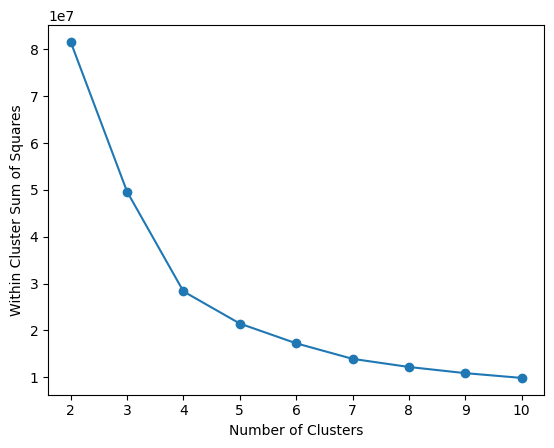

In [7]:
img = cv.imread("images/zebra.jfif")
imgrgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgrgb = imgrgb.reshape((-1, 3))

clust_list = []
clust_range = range(2,11)
Z = np.float32(imgrgb)

for k in clust_range:
    criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv.kmeans(Z, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    clust_list.append(ret)
    
plt.plot(clust_range, clust_list, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

In [12]:
def k_means_clust(img, K, max_iter=10, eps=1.0, attempts=10, flag=cv.KMEANS_PP_CENTERS):
    """
    Args:
    img: 3-channel image array
    K: number of cluster
    By default, max_iter = 10, eps = 1, attempts = 10, k-means++
    """
    # casting and reshape
    img = img.reshape((-1, 3))
    img = np.float32(img)
    criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, max_iter, eps) # 10 max iter, 1.0 eps
    return cv.kmeans(img, K, None, criteria, attempts, flag)


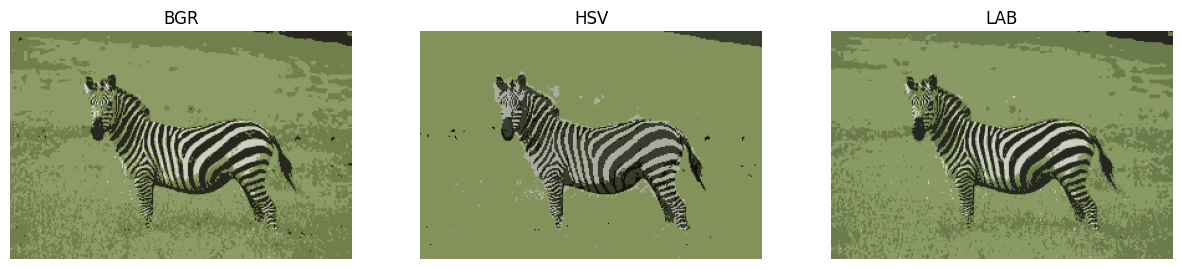

In [10]:
K = 4 # Elbow of the graph

# BGR
ret, label, center, = k_means_clust(img, K)

center = np.uint8(center)
res = center[label.flatten()]
quantbgr = res.reshape(img.shape)
quant_bgr = cv.cvtColor(quantbgr, cv.COLOR_BGR2RGB)

# HSV
imghsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

ret, label, center, = k_means_clust(imghsv, K)
center = np.uint8(center)
res = center[label.flatten()]
quanthsv = res.reshape(imghsv.shape)
quant_hsv = cv.cvtColor(quanthsv, cv.COLOR_HSV2RGB)

# LAB
imglab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

ret, label, center, = k_means_clust(imglab, K)
center = np.uint8(center)
res = center[label.flatten()]
quantlab = res.reshape(imglab.shape)
quant_lab = cv.cvtColor(quantlab, cv.COLOR_LAB2RGB)

plt.figure(figsize=(15,4))
plt.subplot(131), plt.imshow(quant_bgr), plt.title("BGR"), plt.axis('off')
plt.subplot(132), plt.imshow(quant_hsv), plt.title("HSV"), plt.axis('off')

plt.subplot(133), plt.imshow(quant_lab), plt.title("LAB"), plt.axis('off')

plt.show()

# Comments

### BGR
The details of the zebra are visibly clear, but there are a lot of noises from the surrounding

### HSV
The surrounding noises are greatly reduced, but the details of the zebra has been decreased

### LAB
Similarly to BGR, the details of the zebra are clear, but the inside area of the zebra has been affected by the noise reduction